In [56]:
# The linear regression implementation uses a tutorial by Mirko Stojiljković (https://realpython.com/linear-regression-in-python/)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

csv = pd.read_csv('auto-mpg-edit.csv')

horse = np.array(csv['horsepower']).reshape((-1, 1))
mpg = np.array(csv['mpg'])

lr = LinearRegression().fit(horse, mpg)

slope = lr.coef_
intercept = lr.intercept_

print(f"Intercept: {lr.intercept_}")
print(f"Slope: {lr.coef_}")

#predicting mpg for a 98 horsepower.
print(f"90 horsepower =~ {lr.predict([[98]])} mpg")

#obtaining confidence and prediction. reference: https://github.com/xbeat/Machine-Learning/blob/main/Confidence%20and%20Prediction%20Intervals%20with%20Python.md

mpg_pred = lr.predict(horse)
mse = mean_squared_error(mpg, mpg_pred)
std_error = np.sqrt(mse)
z = stats.norm.ppf(0.95)
pi = np.column_stack((mpg_pred - z * std_error, mpg_pred + z * std_error))

t = stats.ttest_ind(csv['horsepower'], mpg)
confidence = t.confidence_interval(confidence_level=0.95)


Intercept: 40.042179128052474
Slope: [-0.15868161]
90 horsepower =~ [24.49138175] mpg
[[11.3408374  27.48630331]
 [ 5.78698119 21.9324471 ]
 [ 8.16720528 24.31267119]
 [ 8.16720528 24.31267119]
 [ 9.75402134 25.89948725]
 [ 0.55048819 16.69595411]
 [-2.94050714 13.20495878]
 [-2.14709911 13.99836681]
 [-3.73391517 12.41155075]
 [ 1.81994104 17.96540695]
 [ 4.99357316 21.13903907]
 [ 6.58038922 22.72585513]
 [ 8.16720528 24.31267119]
 [-3.73391517 12.41155075]
 [16.89469361 33.04015952]
 [16.89469361 33.04015952]
 [16.57733039 32.72279631]
 [18.48150967 34.62697558]
 [18.00546485 34.15093076]
 [24.6700923  40.81555821]
 [18.16414645 34.30961237]
 [17.68810164 33.83356755]
 [16.89469361 33.04015952]
 [14.0384247  30.18389061]
 [17.68810164 33.83356755]
 [-2.14709911 13.99836681]
 [ 0.23312498 16.37859089]
 [-1.35369108 14.79177484]
 [ 1.34389622 17.48936214]
 [18.00546485 34.15093076]
 [17.68810164 33.83356755]
 [16.89469361 33.04015952]
 [18.32282806 34.46829397]
 [16.10128558 32.246751

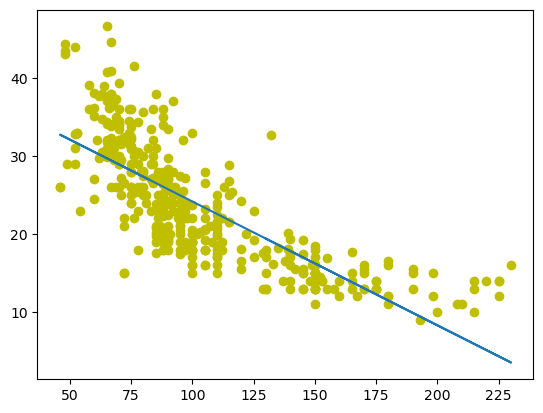

In [57]:
plt.plot(horse,mpg, 'yo')
plt.plot(horse, slope*horse+intercept) 


Is there a relationship between the predictor and the response?
    Yes, a higher horsepower is corellated with a lower mpg.

How strong is the relationshoip between the predictor and the response?
    Fairly strong; the highest mpgs are all in the lower end of horsepowers. The vice versa is less strong, but still present --- lower values of mpg appear in the middle-to-high range of horsepower. 

Is the relationship between the predictor and the response positive or negative? What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?
    The relationship is negative. A 98 horsepower is predicted to have a 24.49 mpg. Confidence interval is 76.78-84.49, and prediction interval is 11.34-27.49.

In your plot, do you see any issues with the fit?
    While it does seem to be the line of best fit, the line doesn't include necessary information such as volume of responses in certain areas -- for example, there are far more datapoints in the higher range of mpgs and low-to-mid range of horsepower. 